<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  K-Nearest Neighbors with `scikit-learn`

_Authors: Alex Sherman (DC)_

<a id="learning-objectives"></a>
## Learning Objectives

1. Utilize the KNN model on the iris data set.
2. Implement scikit-learn's KNN model.
3. Assess the fit of a KNN Model using scikit-learn.

<a id="overview-of-the-iris-dataset"></a>
## Loading the Iris Data Set
---

#### Read the iris data into a pandas DataFrame, including column names.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [2]:
data = Path('.', 'data', 'iris.data') # Works better cross-platform than hard-coding path as a string
iris = pd.read_csv(data)

In [3]:
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.loc[:, 'species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<a id="terminology"></a>

- **150 observations** (n=150): Each observation is one iris flower.
- **Four features** (p=4): sepal length, sepal width, petal length, and petal width.
- **Response**: One of three possible iris species (setosa, versicolor, or virginica)

![](./assets/petal_sepal.jpeg)

In the last two lessons, we built models to predict **numeric variables**, such as median housing prices. Predicting a continuous quantity in this way is called **regression**.

In the next few lessons, we build models to predict **categorical variables**, such as flower species. Predicting a discrete value in this way is called **classification**.

<a id="exercise-human-learning-with-iris-data"></a>
## Guided Practice: "Human Learning" With Iris Data

**Question:** Can we predict the species of an iris using petal and sepal measurements? Together, we will:

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data and check the accuracy of your predictions.

#### Gather some basic information about the data.

In [5]:
# Get the number of rows and columns in the iris dataset.
iris.shape

(150, 5)

In [6]:
# Check the data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# Verify the basic stats look appropriate
# compare mean vs. median for skew
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Test for imbalanced classes
iris.loc[:, 'species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

In [9]:
# Verify we are not missing any data
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Use sorting, split-apply-combine, and/or visualization to look for differences between species.

In [10]:
# Mean of all numeric columns, grouped by species.
# numbers are different enough so that you can classify
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [11]:
# describe() all numeric columns, grouped by species.
iris.groupby('species').describe().loc[:, 'petal_width']

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


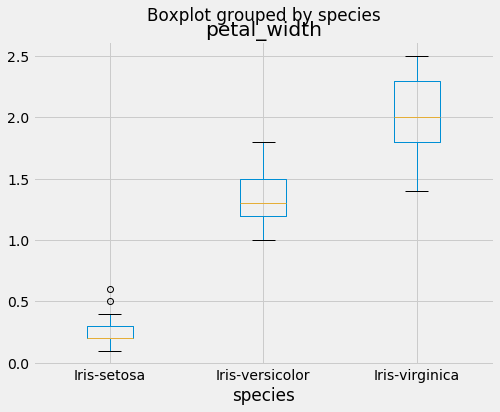

In [12]:
# Box plot of petal_width, grouped by species.
# note there is overlap between versicolor and virginica
iris.boxplot(column='petal_width', by='species')

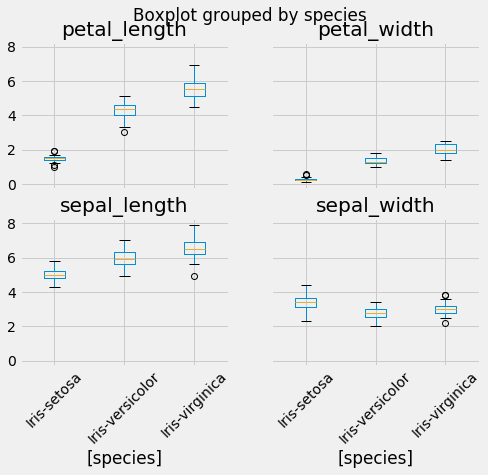

In [13]:
# Box plot of all numeric columns, grouped by species.
# rotate by 45 degrees
iris.boxplot(by='species', rot=45);

In [14]:
# Map species to a numeric value so that plots can be colored by species.
# convert species to numbers with .map()

iris.loc[:, 'species_num'] = (
    iris.loc[:, 'species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
)


In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


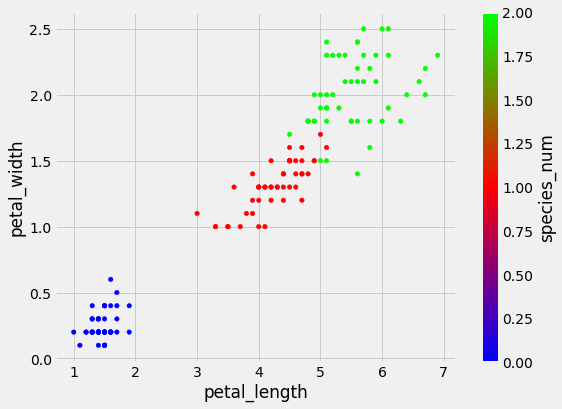

In [16]:
# Scatterplot of petal_length vs. petal_width, colored by species
iris.plot(kind='scatter', 
          x='petal_length', 
          y='petal_width', 
          c='species_num', 
          colormap='brg')

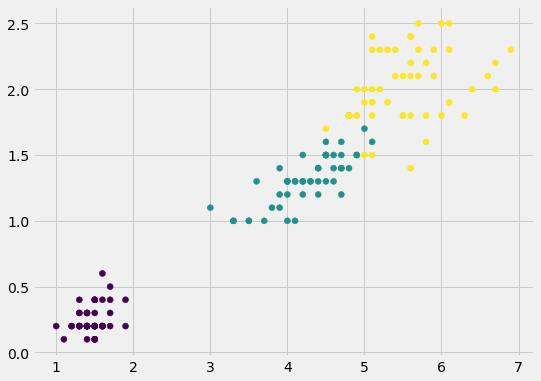

In [17]:
# Ack -- continuous colorbar is not appropriate.
# matplotlib handles this case better when it is called directly.

plt.scatter(data=iris, x='petal_length', y='petal_width', c='species_num');

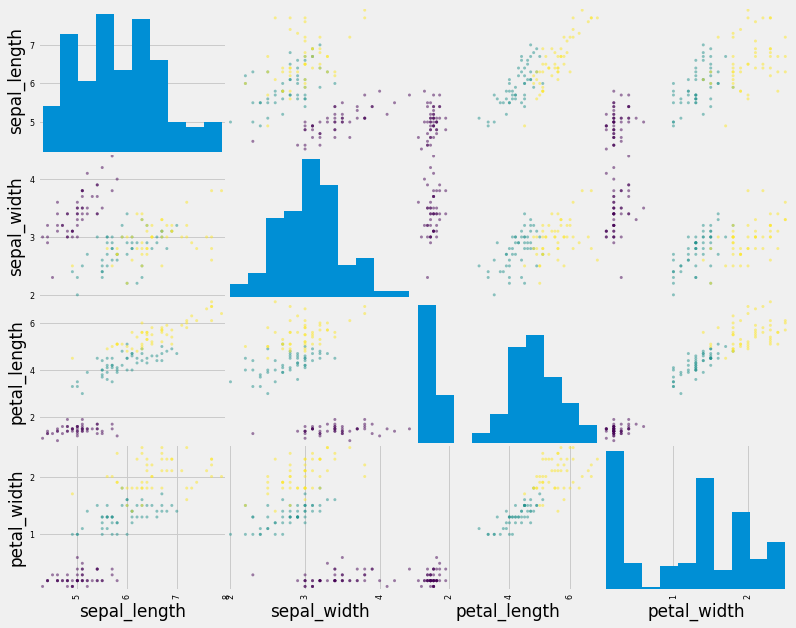

In [18]:
# Scatter matrix of all features, colored by species.
pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.loc[:, 'species_num'], figsize=(12, 10));

**Exercise.**

Write down a set of rules for classifying iris species in the following form:

1. If XYZ, choose Species A.
2. Otherwise if ABC, choose Species B.
3. Otherwise, choose Species C.

if petal_length < 1 and sepal_length < 6 = setosa
if petal_width between 1, 1.8 and sepal_length between 5, 7 = versicolor
if petal_width greater than 1.8 and sepal
    else virginica
    
if sepal_width


If 'petal_length' <=2, choose Iris-setosa
Otherwise, if 'petal_length' <= 5 and 'petal_width' <=1.5, choose Iris-versicolor
else: choose iris-virginica


#### Example

In [19]:
# Define a new feature that represents petal area ("feature engineering").
# As iris petals are more ovular shaped as opposed to rectangular,
# we're going to use the formula for area of an ellipse:
# r1 * r2 * 3.14.

iris.loc[:, 'petal_area'] = iris.loc[:, 'petal_length'] * iris.loc[:, 'petal_width'] * 3.14
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.8792
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.8792
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.8164
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.9420
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.8792


In [20]:
# Description of petal_area, grouped by species.
# Looks like there is good features using area
iris.groupby('species')['petal_area'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,1.139192,0.575398,0.3454,0.83210,0.9420,1.3188,3.0144
Iris-versicolor,50.0,17.962056,4.296785,10.3620,15.26040,17.6311,21.1950,27.1296
Iris-virginica,50.0,35.470068,6.774275,23.5500,30.51295,35.9373,40.1606,49.8318


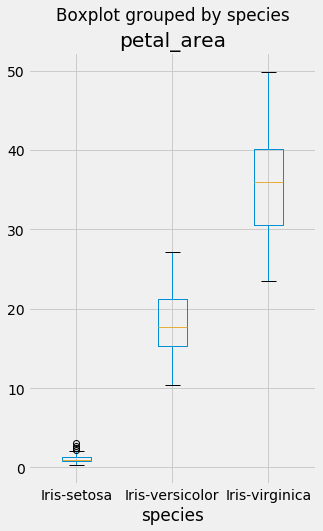

In [21]:
# Box plot of petal_area, grouped by species.
# some overlap, but not a lot
iris.boxplot(column='petal_area', by='species', figsize=(5,8))

In [22]:
# Only show irises with a petal_area between 3 and 7.
# zoom in on the overlap

iris.loc[(iris.loc[:, 'petal_area'] > 23) & (iris.loc[:, 'petal_area'] < 27), :].sort_values('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,23.0790
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,23.0790
119,6.0,2.2,5.0,1.5,Iris-virginica,2,23.5500
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,23.6128
106,4.9,2.5,4.5,1.7,Iris-virginica,2,24.0210
133,6.3,2.8,5.1,1.5,Iris-virginica,2,24.0210
134,6.1,2.6,5.6,1.4,Iris-virginica,2,24.6176
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,25.6224
77,6.7,3.0,5.0,1.7,Iris-versicolor,1,26.6900


My set of rules for predicting species:

- If petal_area is less than 8, predict **setosa**.
- Else if petal_area is less than 24, predict **versicolor**.
- Otherwise, predict **virginica**.

**Exercise.** Implement these rules to make your own classifier!

Write a function that accepts a row of data and returns a predicted species. Then, apply that function to `iris` to make predictions for all existing rows of data and check the accuracy of your predictions.

In [23]:
# Starter code

def predict_flower(row):
    if row.loc['petal_area'] < 8:
        prediction = 'Iris-setosa'
    elif row.loc['petal_area'] < 24:
        prediction = 'Iris-versicolor'
    else:
        prediction = 'Iris-virginica'

    return prediction

# Apply your classifier row-wise
iris.loc[:, 'prediction'] = iris.apply(predict_flower, axis=1)

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.8164,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.9420,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa


### Examine results

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area,prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.8164,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.9420,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.8792,Iris-setosa


In [25]:
# Let's see what percentage your manual classifier gets correct!
# 0.3333 means 1/3 are classified correctly
#97.3% Accuracy in the classifier

sum(iris.loc[:, 'species'] == iris.loc[:, 'prediction']) / 150

0.97333333333333338

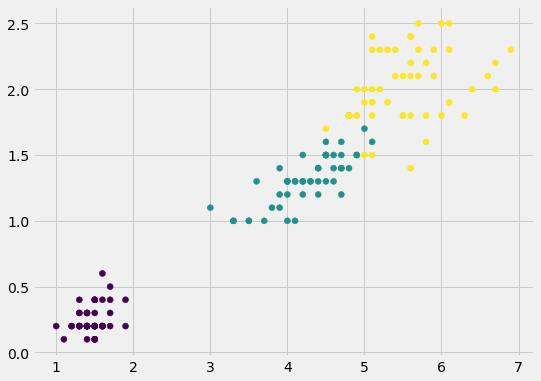

In [26]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES.
plt.scatter(data=iris, x='petal_length', y='petal_width', c='species_num');

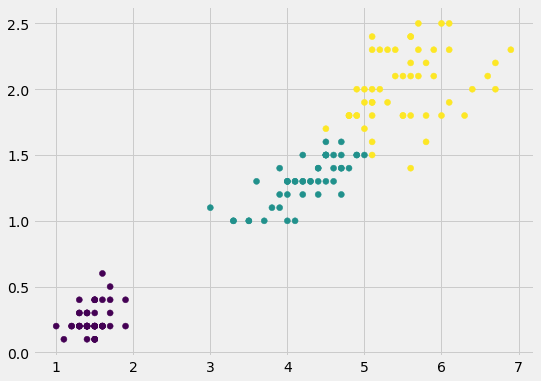

In [27]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by PREDICTED SPECIES.

#create prediction number
iris.loc[:, 'pred_num'] = (
    iris.loc[:, 'prediction'].map({'Iris-setosa': 0,
                                   'Iris-versicolor': 1,
                                   'Iris-virginica': 2
                                  })
)

plt.scatter(data=iris, x='petal_length', y='petal_width', c='pred_num');

<a id="human-learning-on-the-iris-dataset"></a>
## Summary - Human Learning on the Iris Data Set
---

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** had measurements similar to **previous irises**, then its species was most likely the same as those previous irises.

<a id="k-nearest-neighbors-knn-classification"></a>
## K-Nearest Neighbors (KNN) Classification
---

Predict that the value of the target variable for an iris is the most popular value among its K "nearest neighbors."

Which points count as "nearest neighbors" depend on how you measure distance. The most common approach is to use Euclidean distance (square root of the sum of squared differences) in the feature space. 

The plots below illustrate KNN for various k and two features: `x='sepal_length'` and `y='sepal_width'`.

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=1)

![1NN classification map](./assets/iris_01nn_map.png)

### KNN Classification Map for Iris (K=5)

![5NN classification map](./assets/iris_05nn_map.png)

### KNN Classification Map for Iris (K=15)

![15NN classification map](./assets/iris_15nn_map.png)

<a id="knn-classification-map-for-iris-k"></a>
### KNN Classification Map for Iris (K=50)

![50NN classification map](./assets/iris_50nn_map.png)

**Exercise.**

- How does increasing $k$ affect the bias and the variance of a KNN model?

increase k = bias up, variance down

- How can you choose a good $k$ for a particular application?

choose k that maximizes held out data


# KNN Applied to NBA Stats

For the rest of the lesson, we will be using a dataset containing the 2015 season statistics for ~500 NBA players. This dataset leads to a nice choice of K, as we'll see below. The columns we'll use for features (and the target 'pos') are:


| Column | Meaning |
| ---    | ---     |
| pos | C: Center. F: Front. G: Guard |
| ast | Assists per game | 
| stl | Steals per game | 
| blk | Blocks per game |
| tov | Turnovers per game | 
| pf  | Personal fouls per game | 

For information about the other columns, see [this glossary](https://www.basketball-reference.com/about/glossary.html).

In [28]:
# Read the NBA data into a DataFrame.
from pathlib import Path
path = Path('.', 'data', 'NBA_players_2015.csv')
nba = pd.read_csv(path, index_col=0)

In [29]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [30]:
nba.shape

(478, 48)

In [31]:
# Map positions to numbers.
nba.loc[:, 'pos_num'] = nba.loc[:,'pos'].map({'F':1, 'G':2, 'C':0})
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg_,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
season_end,,,,,,,,,,,,,,,,,,,,,
2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,0.469,...,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,1
2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,0.474,...,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,2
2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,0.550,...,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,0
2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,0.432,...,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,1
2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,0.426,...,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,2


In [32]:
# Create feature matrix (X).
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba.loc[:, feature_cols]


In [33]:
# Create response vector (y).
y = nba.loc[:, 'pos_num']


<a id="using-the-traintest-split-procedure-k"></a>
### Using the Train/Test Split Procedure (K=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Step 1: Split X and y into training and testing sets (using `random_state` for reproducibility).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)


#### Step 2: Train the model on the training set (using K=1).

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Step 3: Test the model on the testing set and check the accuracy.

In [37]:
y_pred_class = knn1.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

#62% Accuracy

0.6166666666666667

#### Repeating for K=50.

In [38]:
knn50 = KNeighborsClassifier(n_neighbors=50)
knn50.fit(X_train, y_train)
y_pred_class = knn50.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

#67.5% Accuracy

0.67500000000000004

**Exercise**

- What accuracy would you expect a KNN model with $k=1$ to achieve on the *training set*? Would we expect accuracy on the training set to be higher or lower with $k=50$?

Expect 100% accuracy on training set when k=1 unless 2 players with different positions have exactly the same stats. Expect accuracy to go down as k goes up.

#### Comparing Testing Accuracy With Null Accuracy

Null accuracy is the accuracy that can be achieved by **always predicting the most frequent class**. For example, if most players in our data set are Centers, we would always predict Center.

The null accuracy is a benchmark against which you may want to measure every classification model.

#### Examine the class distribution from the training set.

Remember that we are comparing KNN to this simpler model. So, we must find the most frequent class **of the training set**.

In [39]:
y_train.value_counts()

1    150
2    140
0     68
Name: pos_num, dtype: int64

#### Compute null accuracy.

In [40]:


y_pred_null = np.ones(y_test.shape)
metrics.accuracy_score(y_test, y_pred_null)

0.40833333333333333

<a id="tuning-a-knn-model"></a>
## Tuning a KNN Model
---

In [41]:
# Instantiate the model (using the value K=5).
knn = KNeighborsClassifier(n_neighbors=5)

In [42]:
# Fit the model with data.
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
y_pred_class = knn.predict(X_test)

In [44]:
# Calculate predicted probabilities of class membership.
# Each row sums to one and contains the probabilities of the point being a 0-Center, 1-Front, 2-Guard.

df = pd.DataFrame(knn.predict_proba(X_test))
#df.columns

<a id="what-happen-if-we-view-the-accuracy-of-our-training-data"></a>
### Accuracy as a Function of $k$

In [45]:
#Accuracy on the training set - training the whole dataset
#not sensible

scores = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred = knn.predict(X)
    score = (pred == y).mean()
    scores.append([k, score])

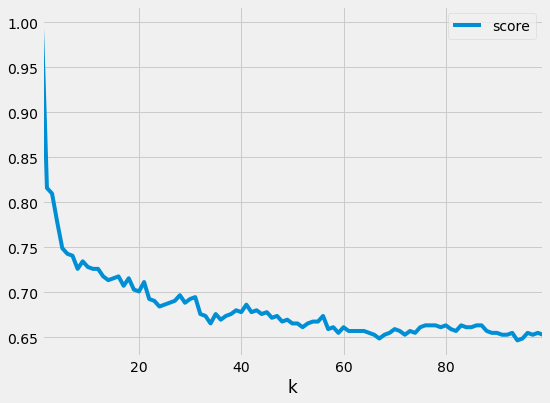

In [46]:
data = pd.DataFrame(scores, columns=['k', 'score'])
data.plot.line(x='k', y='score');

**Exercise:** Why does the accuracy on the training set fall as $k$ increases?

As model gets simpler, our accuracy goes down

#### Search for the "best" value of K.

In [47]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.
training_error = []
testing_error = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [48]:
# Create a DataFrame of K, training error, and testing error.
column_dict = ({'K': range(1, 100),
                'training_error': training_error,
                'testing_error': testing_error})

df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.head()

,testing_error,training_error
K,,
1,0.383333,0.000000
2,0.450000,0.206704
3,0.366667,0.178771
4,0.383333,0.223464
5,0.325000,0.268156


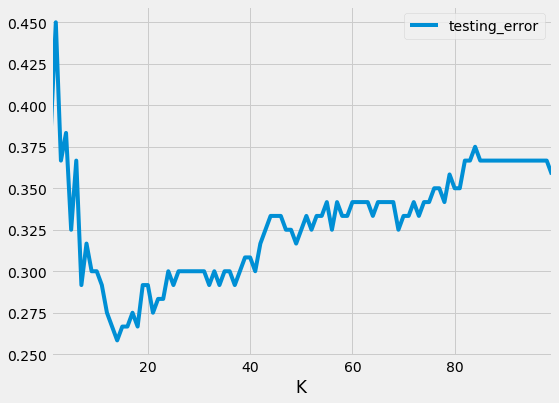

In [49]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing_error')

In [50]:
# Find the minimum testing error and the associated K value.
df.sort_values('testing_error').head(1)

,testing_error,training_error
K,,
14,0.258333,0.312849


<a id="training-error-versus-testing-error"></a>
### Training Error Versus Testing Error

In [ ]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
 

- **Training error** decreases as model complexity increases (lower value of K).
- **Testing error** is minimized at the optimum model complexity.

**Evaluating training and testing error:**

- If training error is unacceptably high, then you have a bias problem.
- If training error is low enough but there is a big gap between training and test error, then you have a variance problem.

**Conclusions**

- When using KNN on this data set with these features, the **best value for K** is likely to be around 14.
- Given the statistics of an **unknown player**, we estimate that we would be able to correctly predict his position about 74% of the time.

<a id="standardizing-features"></a>
## Standardizing Features
---

There is one major issue that applies to many machine learning models: They are sensitive to feature scale. 

> KNN in particular is sensitive to feature scale because it (by default) uses the Euclidean distance metric. To determine closeness, Euclidean distance sums the square difference along each axis. So, if one axis has large differences and another has small differences, the former axis will contribute much more to the distance than the latter axis.

This means that it matters whether our feature are centered around zero and have similar variance to each other.

In the case of KNN on the iris data set, imagine we measure sepal length in kilometers, but we measure sepal width in millimeters. Our data will show variation in sepal width, but almost no variation in sepal length.

Unfortunately, KNN cannot automatically adjust to this. Other models tend to struggle with scale as well, even linear regression, when you get into more advanced methods such as regularization.

Fortunately, this is an easy fix.

<a id="use-standardscaler-to-standardize-our-data"></a>
### Use `StandardScaler` to Standardize our Data

StandardScaler standardizes our data by subtracting the mean from each feature and dividing by its standard deviation.

#### Separate feature matrix and response for scikit-learn.

In [51]:
# Create feature matrix (X).

feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']

X = nba.loc[:, feature_cols]
y = nba.loc[:, 'pos_num']

#### Create the train/test split.

Notice that we create the train/test split first. This is because we will reveal information about our testing data if we standardize right away.

In [54]:
#train test split, then standardize


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


#### Instantiate and fit `StandardScaler`.

In [58]:
#StandardScaler is a transformer

from sklearn.preprocessing import StandardScaler

#standardize X_train and X_test - now all features in feature_cols will have the same scale (sepal length vs width diffs)
scaler = StandardScaler()
scaler.fit(X_train)   # learns the mean and variance of X_train
X_train = scaler.transform(X_train)  #transforms by subtracting the mean and divide by std, overwrite X_train with the results
X_test = scaler.transform(X_test)  #apply for X_test, but note we didn't train on the test - that would be cheating!




#### Fit a KNN model and look at the testing error.
Can you find a number of neighbors that improves our results from before?

In [60]:
# Calculate testing error.  Train model on the standard features

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_class)

error = 1 - accuracy

error

0.31666666666666665

<a id="comparing-knn-with-other-models"></a>
## Comparing KNN With Other Models
---

**Advantages of KNN:**

- It's simple to understand and explain.
- Model training is fast.
- It can be used for classification and regression (for regression, take the average value of the K nearest points!).
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.
    - Linear Regression is parametric - made to fit a particular shape, straight line, hyper pane, etc.  
    - KNN can have irregular boundaries - doesn't suppose a shape, but supposes that things are similar to its neighbors

**Disadvantages of KNN:**

- It must store all of the training data.
- Its prediction phase can be slow when n is large.
- It is sensitive to irrelevant features.
- It is sensitive to the scale of the data.
- Accuracy is (generally) not competitive with the best supervised learning methods.

# Projects

Due today (2/22):

- Final Project Part 2

Due one week from today (3/1):

- [Final Project Part 3](https://git.generalassemb.ly/datr1618/final_project/blob/master/requirements.md#eda)

# Questions?

```
=========================================
@channel
Exit Ticket: https://goo.gl/forms/OUw4gyTiRKMOTI3t2        

#feedback
=========================================
```